In [ ]:
pip install matplotlib seaborn wordcloud vaderSentiment transformers torch torchvision torch-xla polars

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.6/90.6 MB 8.0 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import re
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import warnings
import polars as pl


# Ignorar las advertencias de fuentes faltantes
warnings.filterwarnings("ignore", category=UserWarning, module="matplotlib")

In [ ]:
# Descargar recursos necesarios de NLTK
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
coment_tweets= pd.read_csv('/content/drive/MyDrive/tesis/COMENTARIOS CONSOLIDADOS.csv',delimiter=';')
coment_tweets = pl.from_pandas(coment_tweets)
coment_tweets

Link,author,comment,date,source
str,str,str,str,str
"""https://www.instagram.com/p/DA…","""correodebu""","""🔥👏""","""2024-10-01 00:47:50""","""instagram"""
"""https://www.instagram.com/p/DA…","""carolaalvarezv""","""🙌🙌🙌🙌❤️""","""2024-10-01 01:33:14""","""instagram"""
"""https://www.instagram.com/p/DA…","""oscargon2022""","""👍👍👍👍👍🍻🍻🍻🍻🍻""","""2024-10-02 19:54:14""","""instagram"""
"""https://www.instagram.com/p/DA…","""clubcolombia""","""@correodebu, 🍻🌾.""","""2024-10-04 13:51:27""","""instagram"""
"""https://www.instagram.com/p/DA…","""clubcolombia""","""@carolaalvarezv, 🌾✨.""","""2024-10-04 13:51:42""","""instagram"""
…,…,…,…,…
"""https://x.com/CervezaPoker/sta…","""@GallegoEdilma""","""""Sálvame"" con unas Boleticas p…","""2023-10-05 21:12:01""","""Twitter"""
"""https://x.com/CervezaPoker/sta…","""@CervezaPoker""","""¡Vamos pa' esaaaa! Te salvare…","""2023-10-07 15:59:59""","""Twitter"""
"""https://x.com/CervezaPoker/sta…","""@CervezaPoker""","""Parceros, ¿qué los tiene sobre…","""2023-10-04 15:55:16""","""Twitter"""


In [ ]:
coment_tweets= pl.read_csv('/content/drive/MyDrive/tesis/COMENTARIOS CONSOLIDADOS.csv',truncate_ragged_lines=True,separator=";")
coment_tweets

Link,author,comment,date,source
str,str,str,str,str
"""https://www.instagram.com/p/DA…","""correodebu""","""🔥👏""","""2024-10-01 00:47:50""","""instagram"""
"""https://www.instagram.com/p/DA…","""carolaalvarezv""","""🙌🙌🙌🙌❤️""","""2024-10-01 01:33:14""","""instagram"""
"""https://www.instagram.com/p/DA…","""oscargon2022""","""👍👍👍👍👍🍻🍻🍻🍻🍻""","""2024-10-02 19:54:14""","""instagram"""
"""https://www.instagram.com/p/DA…","""clubcolombia""","""@correodebu, 🍻🌾.""","""2024-10-04 13:51:27""","""instagram"""
"""https://www.instagram.com/p/DA…","""clubcolombia""","""@carolaalvarezv, 🌾✨.""","""2024-10-04 13:51:42""","""instagram"""
…,…,…,…,…
"""https://x.com/CervezaPoker/sta…","""@GallegoEdilma""","""""Sálvame"" con unas Boleticas p…","""2023-10-05 21:12:01""","""Twitter"""
"""https://x.com/CervezaPoker/sta…","""@CervezaPoker""","""¡Vamos pa' esaaaa! Te salvare…","""2023-10-07 15:59:59""","""Twitter"""
"""https://x.com/CervezaPoker/sta…","""@CervezaPoker""","""Parceros, ¿qué los tiene sobre…","""2023-10-04 15:55:16""","""Twitter"""


In [ ]:
print(coment_tweets.dtypes)

Link       object
author     object
comment    object
date       object
source     object
dtype: object


In [ ]:
coment_tweets.shape

(83742, 5)

In [ ]:
tweets_bav= pd.read_csv('/content/drive/MyDrive/tesis/new_post_with_topics (1).csv',encoding='latin',delimiter=';')
tweets_bav

,account_name,date,content,link,likes,source,conteo_post,cleaned_content,word_count,topic,WORDS TOPIC,Nombre
0,bavaria_colombia,2024-10-12 00:00:00,??? En este fin de semana festivo recuerda ser...,https://www.instagram.com/p/DBBssgYpnVJ/,72,instagram,1,??? fin semana festivo recuerda ser buen actor...,24,1,"parche,parceros,así,concierto,vemos",Vive el Parche
1,bavaria_colombia,2024-10-11 00:00:00,#ValeLaPenaLeer ?? | Andrés Ospina - @af_ospi...,https://www.instagram.com/p/DBADbRKScYe/?img_i...,711,instagram,1,?? andrés ospina head of draftline innovation ...,71,5,"millones,premios,tapa,peso,goles",Millones por Destapar
2,bavaria_colombia,2024-10-11 00:00:00,"???¡Cerveza, amigas y muchas risas! Recuerda e...",https://www.instagram.com/p/DA_-1URJxxD/,59,instagram,1,???cerveza amigas muchas risas recuerda fin se...,18,4,"frías,cerveza,fútbol,combo",Goles y Frías
3,bavaria_colombia,2024-10-11 00:00:00,"?Hoy nuestro brindis va por Andrés Ospina, dir...",https://www.instagram.com/p/DA_dKbjp8Jf/,475,instagram,1,?hoy brindis va andrés ospina director equipo ...,56,3,"conoce,convocatoria,parte,equipo,aquí",Juntos en Equipo
4,bavaria_colombia,2024-10-10 00:00:00,¡Así vivimos la semana pasada la experiencia #...,https://www.instagram.com/p/DA91MIxpe39/,65,instagram,1,así vivimos semana pasada experiencia ?? tip m...,14,1,"parche,parceros,así,concierto,vemos",Vive el Parche
...,...,...,...,...,...,...,...,...,...,...,...,...
2604,CervezaPoker,2023-10-31 00:00:00,Breve vamos a Salvar a 10 parceros de este par...,https://x.com/CervezaPoker/status/171938103262...,28,Twitter,1,breve vamos salvar parceros parche vayan medal...,8,1,"parche,parceros,así,concierto,vemos",Vive el Parche
2605,CervezaPoker,2023-10-26 00:00:00,¿Quién ya tiene boleta para el Soy Rebelde Tou...,https://x.com/CervezaPoker/status/171758330158...,146,Twitter,1,quién boleta rebelde tour faltan tiquetes avió...,17,2,"junto,mejor,gratis,futuro,tenderos",Tenderos y Futuro
2606,CervezaPoker,2023-10-17 00:00:00,"Parceros, ir al Soy Rebelde Tour es demasiado ...",https://x.com/CervezaPoker/status/171437893005...,5,Twitter,1,parceros ir rebelde tour demasiado fácil regís...,17,1,"parche,parceros,así,concierto,vemos",Vive el Parche
2607,CervezaPoker,2023-10-05 00:00:00,¿Sin boleta para el Soy Rebelde Tour? \n\nEscr...,https://x.com/CervezaPoker/status/171003915938...,16,Twitter,1,boleta rebelde tour escríbanme unas regalar,6,2,"junto,mejor,gratis,futuro,tenderos",Tenderos y Futuro


In [ ]:
tweets_bav= pl.read_csv('/content/drive/MyDrive/tesis/new_post_with_topics (1).csv',truncate_ragged_lines=True,separator=';',encoding='latin')
tweets_bav

account_name,date,content,link,likes,source,conteo_post,cleaned_content,word_count,topic,WORDS TOPIC,Nombre
str,str,str,str,i64,str,i64,str,i64,i64,str,str
"""bavaria_colombia""","""2024-10-12 00:00:00""","""??? En este fin de semana fest…","""https://www.instagram.com/p/DB…",72,"""instagram""",1,"""??? fin semana festivo recuerd…",24,1,"""parche,parceros,así,concierto,…","""Vive el Parche"""
"""bavaria_colombia""","""2024-10-11 00:00:00""",""" #ValeLaPenaLeer ?? | Andrés O…","""https://www.instagram.com/p/DB…",711,"""instagram""",1,"""?? andrés ospina head of draft…",71,5,"""millones,premios,tapa,peso,gol…","""Millones por Destapar"""
"""bavaria_colombia""","""2024-10-11 00:00:00""","""???¡Cerveza, amigas y muchas r…","""https://www.instagram.com/p/DA…",59,"""instagram""",1,"""???cerveza amigas muchas risas…",18,4,"""frías,cerveza,fútbol,combo""","""Goles y Frías"""
"""bavaria_colombia""","""2024-10-11 00:00:00""","""?Hoy nuestro brindis va por An…","""https://www.instagram.com/p/DA…",475,"""instagram""",1,"""?hoy brindis va andrés ospina …",56,3,"""conoce,convocatoria,parte,equi…","""Juntos en Equipo"""
"""bavaria_colombia""","""2024-10-10 00:00:00""","""¡Así vivimos la semana pasada …","""https://www.instagram.com/p/DA…",65,"""instagram""",1,"""así vivimos semana pasada expe…",14,1,"""parche,parceros,así,concierto,…","""Vive el Parche"""
…,…,…,…,…,…,…,…,…,…,…,…
"""CervezaPoker""","""2023-10-31 00:00:00""","""Breve vamos a Salvar a 10 parc…","""https://x.com/CervezaPoker/sta…",28,"""Twitter""",1,"""breve vamos salvar parceros pa…",8,1,"""parche,parceros,así,concierto,…","""Vive el Parche"""
"""CervezaPoker""","""2023-10-26 00:00:00""","""¿Quién ya tiene boleta para el…","""https://x.com/CervezaPoker/sta…",146,"""Twitter""",1,"""quién boleta rebelde tour falt…",17,2,"""junto,mejor,gratis,futuro,tend…","""Tenderos y Futuro"""
"""CervezaPoker""","""2023-10-17 00:00:00""","""Parceros, ir al Soy Rebelde To…","""https://x.com/CervezaPoker/sta…",5,"""Twitter""",1,"""parceros ir rebelde tour demas…",17,1,"""parche,parceros,así,concierto,…","""Vive el Parche"""


In [ ]:
tweets_bav.shape

(2623, 6)

In [ ]:
tweets_bav['link']=tweets_bav['link'].str.replace(r'(/status/\d+|/p/[a-zA-Z0-9]+).*', r'\1', regex=True)
coment_tweets['Link']=coment_tweets['Link'].str.replace(r'(/status/\d+|/p/[a-zA-Z0-9]+).*', r'\1', regex=True)

In [ ]:
# tweets_bav.to_parquet('tweets_bav.parquet', engine='pyarrow')
# coment_tweets.to_parquet('coment_tweets.parquet', engine='pyarrow')

In [ ]:
comentarios_por_publicacion = coment_tweets['Link'].value_counts().reset_index()
comentarios_por_publicacion.columns = ['Link', 'cantidad_comentarios']

tweets_bav = tweets_bav.merge(comentarios_por_publicacion, left_on='link',right_on="Link", how='left')
tweets_bav['cantidad_comentarios'] = tweets_bav['cantidad_comentarios'].fillna(0).astype(int)


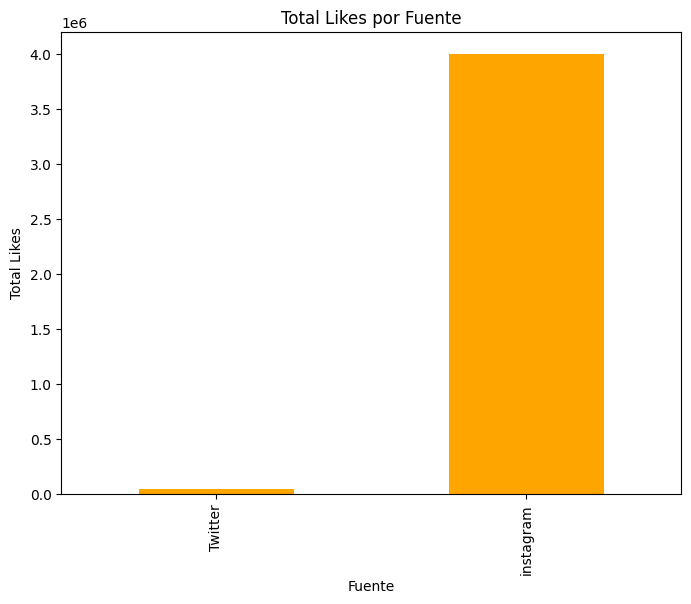

In [ ]:
import matplotlib.pyplot as plt

# Agrupar por 'source' y sumar los likes, luego graficar
plt.figure(figsize=(8, 6))
tweets_bav.groupby('source')['likes'].sum().plot(kind='bar', color='orange')
plt.title('Total Likes por Fuente')
plt.xlabel('Fuente')
plt.ylabel('Total Likes')
plt.show()

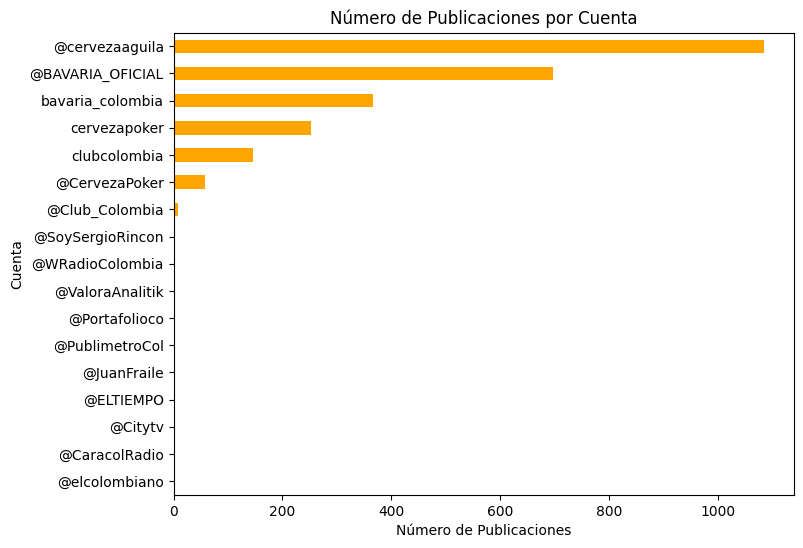

In [ ]:
# Contar el número de publicaciones por cuenta y graficar en forma horizontal
plt.figure(figsize=(8, 6))
tweets_bav['account_name'].value_counts().sort_values(ascending=True).plot(kind='barh', color='orange')
plt.title('Número de Publicaciones por Cuenta')
plt.xlabel('Número de Publicaciones')
plt.ylabel('Cuenta')
plt.show()

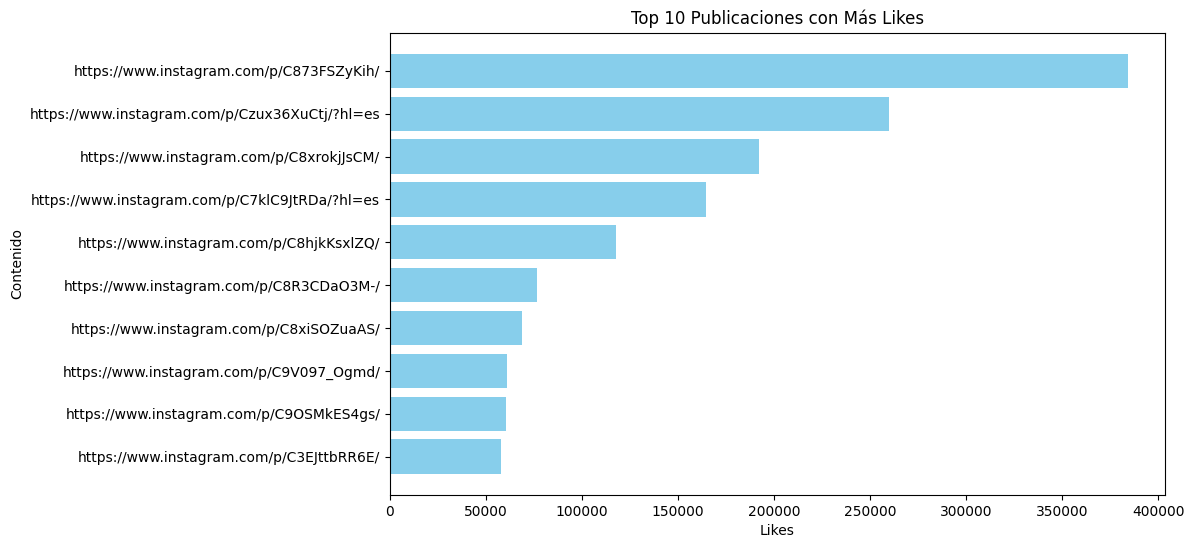

In [ ]:
import matplotlib.pyplot as plt
import warnings

# Ignorar las advertencias de fuentes faltantes
warnings.filterwarnings("ignore")
top_posts = tweets_bav.nlargest(10, 'likes')
plt.figure(figsize=(10, 6))
plt.barh(top_posts['link'], top_posts['likes'], color='skyblue')
plt.title('Top 10 Publicaciones con Más Likes')
plt.xlabel('Likes')
plt.ylabel('Contenido')
plt.gca().invert_yaxis()  # Poner los posts con más "me gusta" en la parte superior
plt.show()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


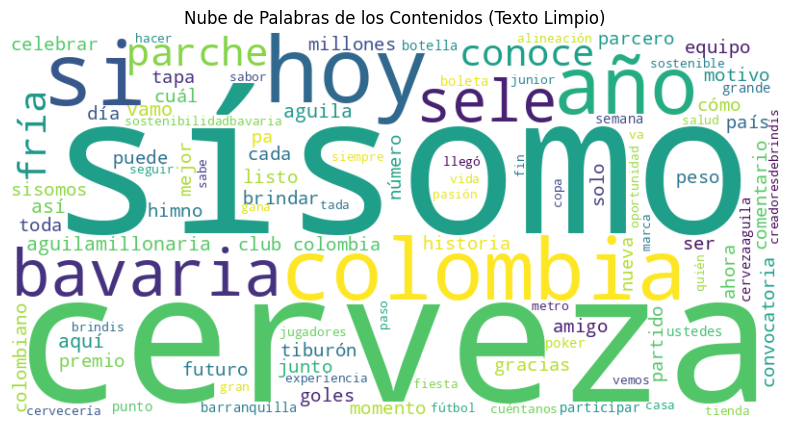

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import stopwords

# Descargar las stopwords en español de nltk
nltk.download('stopwords')
spanish_stopwords = set(stopwords.words('spanish'))

# Agregar palabras adicionales a las stopwords
extra_stopwords = {"https", "www", "com", "instagram", "twitter", "link", "publicacion", "cuenta"}
stopwords_total = STOPWORDS.union(spanish_stopwords, extra_stopwords)

# Función para limpiar el texto
def limpiar_texto(texto):
    texto = texto.lower()  # Convertir a minúsculas
    texto = re.sub(r'http\S+', '', texto)  # Eliminar enlaces
    texto = re.sub(r'[^a-záéíóúñü ]', '', texto)  # Eliminar caracteres especiales excepto letras y espacios
    return texto

# Aplicar la función de limpieza a la columna 'content' y concatenar todo el texto
texto_limpio = " ".join(tweets_bav['content'].dropna().apply(limpiar_texto))

# Crear la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis',
                      max_words=100, stopwords=stopwords_total).generate(texto_limpio)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Quitar los ejes
plt.title('Nube de Palabras de los Contenidos (Texto Limpio)')
plt.show()


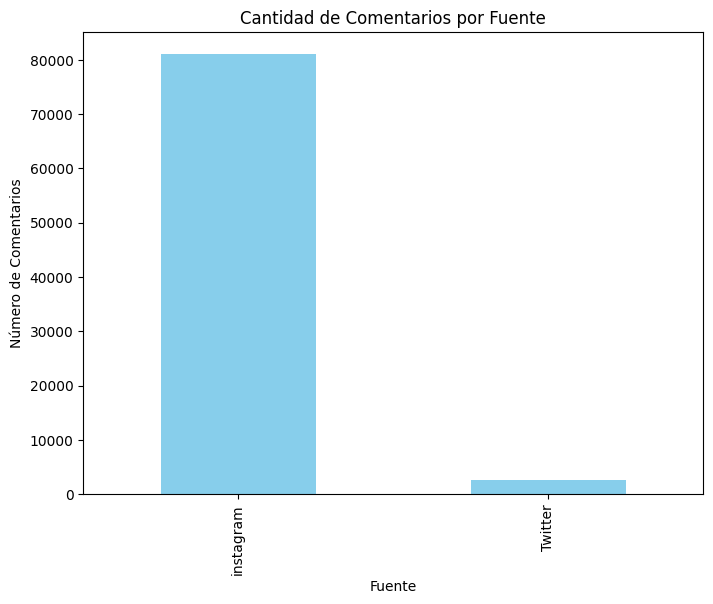

In [ ]:
import matplotlib.pyplot as plt

# Contar la cantidad de comentarios por fuente y graficar
plt.figure(figsize=(8, 6))
coment_tweets['source'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Cantidad de Comentarios por Fuente')
plt.xlabel('Fuente')
plt.ylabel('Número de Comentarios')
plt.show()

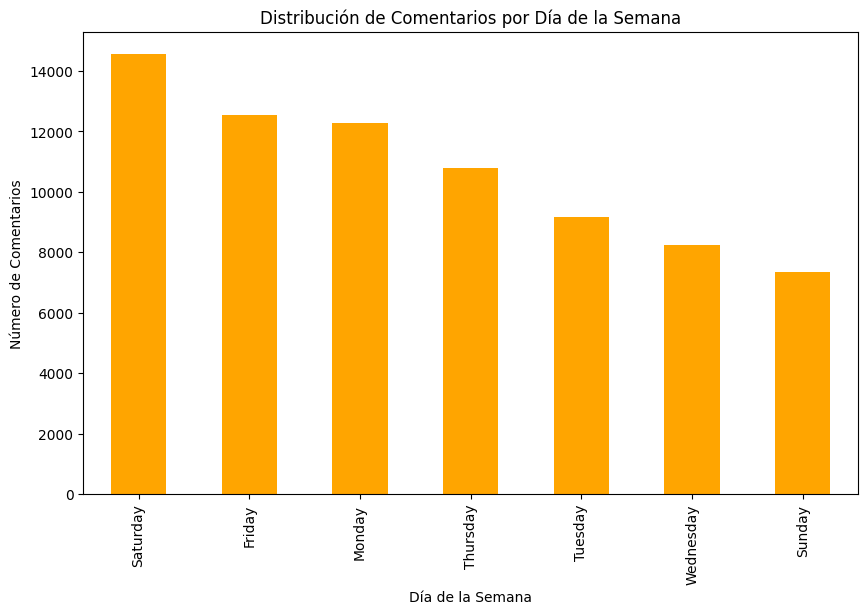

In [ ]:
# Asegurarse de que 'date' esté en formato de fecha
coment_tweets['date'] = pd.to_datetime(coment_tweets['date'], errors='coerce')

# Crear una columna con el nombre del día de la semana
coment_tweets['day_of_week'] = coment_tweets['date'].dt.day_name()

# Graficar la cantidad de comentarios por día de la semana
plt.figure(figsize=(10, 6))
coment_tweets['day_of_week'].value_counts().plot(kind='bar', color='orange')
plt.title('Distribución de Comentarios por Día de la Semana')
plt.xlabel('Día de la Semana')
plt.ylabel('Número de Comentarios')
plt.show()



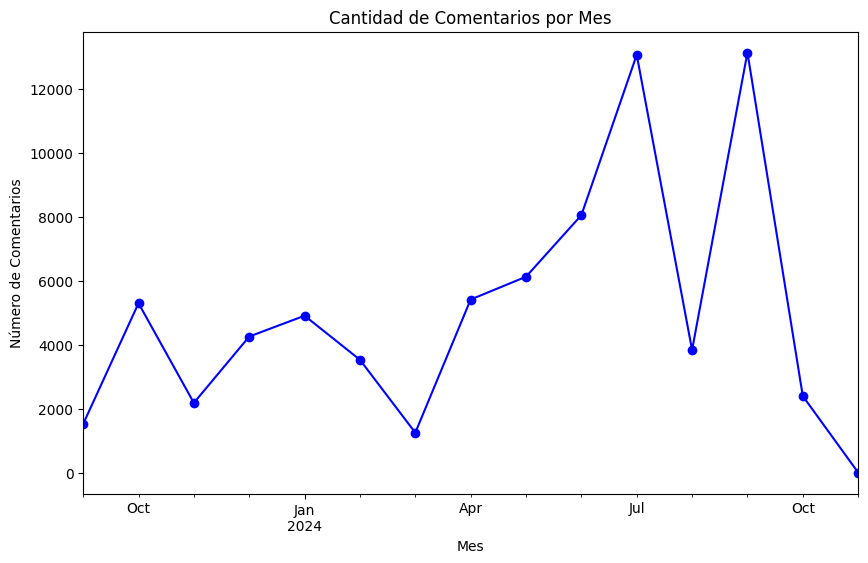

In [ ]:
# Crear una columna con el año y el mes
coment_tweets['month'] = coment_tweets['date'].dt.to_period('M')

# Graficar la cantidad de comentarios por mes
plt.figure(figsize=(10, 6))
coment_tweets['month'].value_counts().sort_index().plot(kind='line', marker='o', color='blue')
plt.title('Cantidad de Comentarios por Mes')
plt.xlabel('Mes')
plt.ylabel('Número de Comentarios')
plt.show()

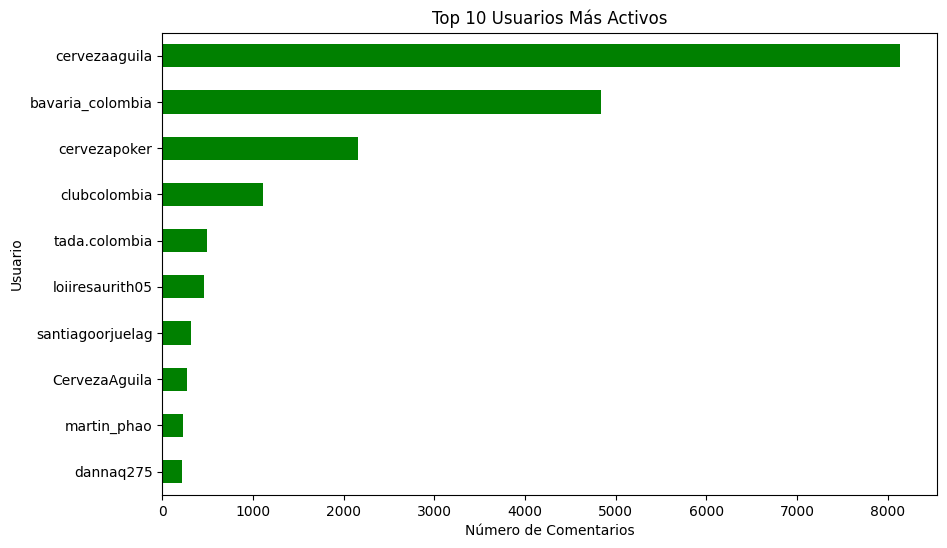

In [ ]:
# Contar los comentarios por autor y seleccionar los 10 más activos
top_authors = coment_tweets['author'].value_counts().head(10)

# Graficar los autores más activos
plt.figure(figsize=(10, 6))
top_authors.plot(kind='barh', color='green')
plt.title('Top 10 Usuarios Más Activos')
plt.xlabel('Número de Comentarios')
plt.ylabel('Usuario')
plt.gca().invert_yaxis()
plt.show()

In [ ]:
import nltk
from nltk import FreqDist
from nltk.util import ngrams
from nltk.corpus import stopwords
import re
import matplotlib.pyplot as plt

# Descargar stopwords en español de nltk
nltk.download('stopwords')
spanish_stopwords = set(stopwords.words('spanish'))

# Concatenar todos los comentarios y limpiar el texto
text = " ".join(coment_tweets['comment'].dropna().tolist())
text = re.sub(r'http\S+|@\S+|#\S+', '', text)  # Quitar enlaces, menciones y hashtags
text = re.sub(r'[^a-záéíóúñü ]', '', text.lower())  # Convertir a minúsculas y quitar caracteres especiales

# Tokenizar el texto y eliminar stopwords
words = [word for word in text.split() if word not in spanish_stopwords]

# Generar bigramas, trigramas y cuatrigramas
bigrams = list(ngrams(words, 2))
trigrams = list(ngrams(words, 3))
quadrigrams = list(ngrams(words, 4))

# Contar la frecuencia de bigramas, trigramas y cuatrigramas
bigram_freq = FreqDist(bigrams)
trigram_freq = FreqDist(trigrams)
quadrigram_freq = FreqDist(quadrigrams)

# Mostrar los 10 bigramas, trigramas y cuatrigramas más comunes
print("Bigramas más comunes:")
print(bigram_freq.most_common(10))

print("\nTrigramas más comunes:")
print(trigram_freq.most_common(10))

print("\nCuatrigramas más comunes:")
print(quadrigram_freq.most_common(10))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Bigramas más comunes:
[(('amo', 'rubigol'), 647), (('redes', 'sociales'), 600), (('club', 'colombia'), 594), (('pendiente', 'redes'), 510), (('ser', 'parte'), 431), (('unas', 'frías'), 429), (('quiero', 'ir'), 404), (('diablo', 'grande'), 337), (('predicción', 'futuro'), 290), (('toda', 'información'), 264)]

Trigramas más comunes:
[(('pendiente', 'redes', 'sociales'), 369), (('invitamos', 'pendiente', 'redes'), 189), (('club', 'colombia', 'trigo'), 156), (('webinar', 'terminó', 'convocatoria'), 111), (('diablo', 'grande', 'latinoamérica'), 98), (('comentamos', 'convocatoria', 'finalizó'), 92), (('sigue', 'pendiente', 'redes'), 89), (('escríbenos', 'vía', 'inbox'), 89), (('quieres', 'ser', 'parte'), 86), (('diablo', 'grande', 'suramérica'), 83)]

Cuatrigramas más comunes:
[(('invitamos', 'pendiente', 'redes', 'sociales'), 168), (('pendiente', 'redes', 'sociales', 'próximas'), 73), (('vimos', 'futuro', 'hermoso', 'maravilloso'), 73), (('vamos', 'brindando', 'juntos', 'amistad'), 72), ((

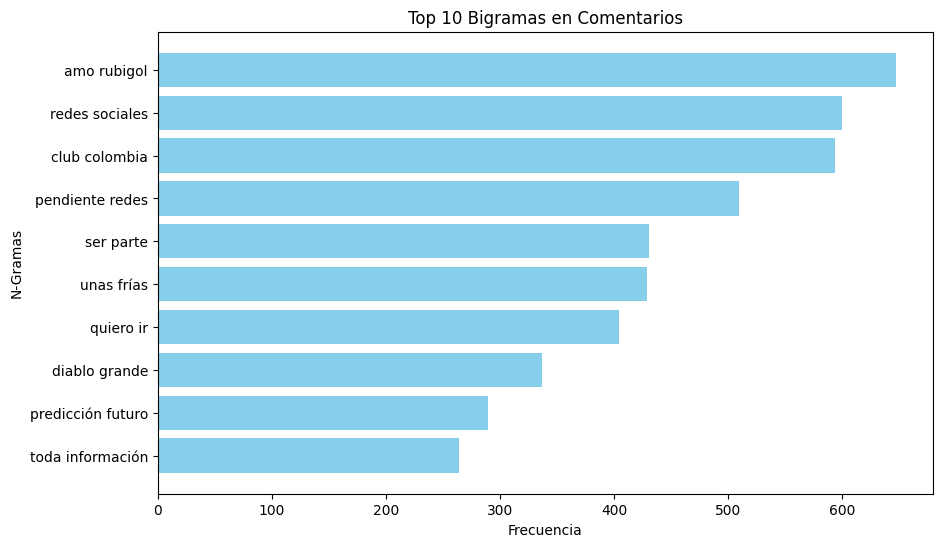

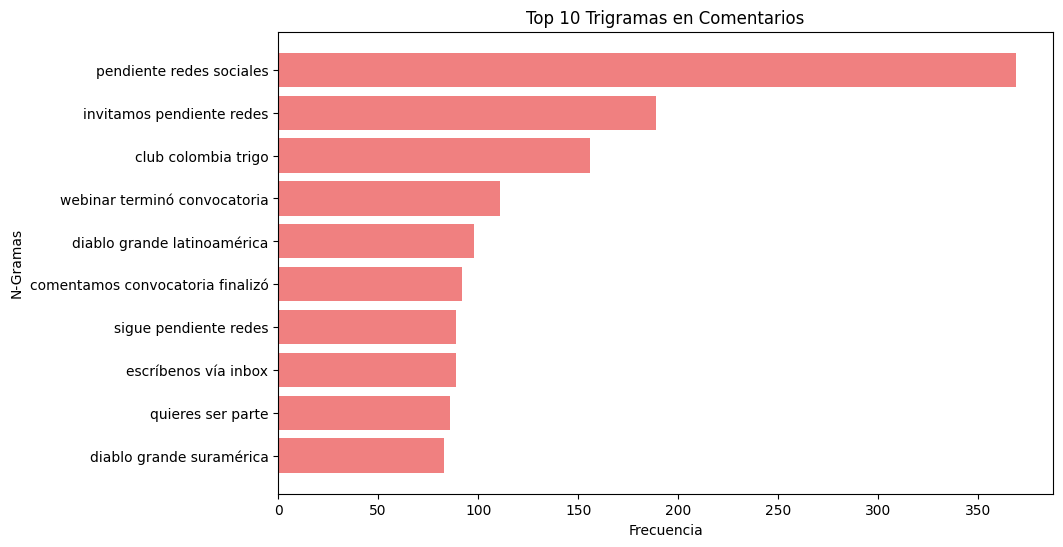

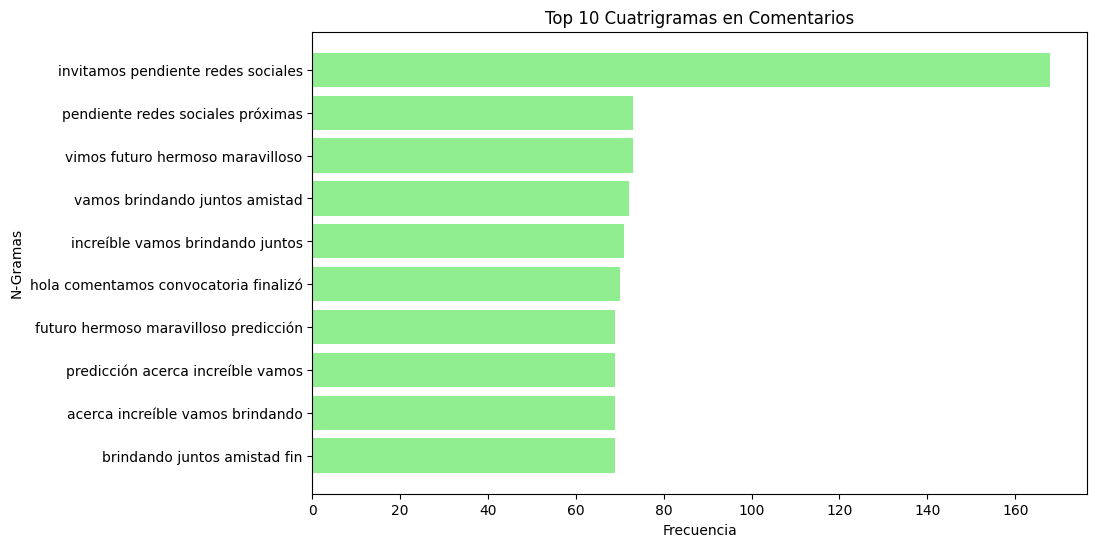

In [ ]:
# Función para graficar n-gramas
def graficar_ngramas(ngrams_freq, titulo, color):
    ngram_labels, ngram_counts = zip(*ngrams_freq)
    ngram_labels = [' '.join(ngram) for ngram in ngram_labels]  # Unir palabras de cada n-grama

    plt.figure(figsize=(10, 6))
    plt.barh(ngram_labels, ngram_counts, color=color)
    plt.title(titulo)
    plt.xlabel('Frecuencia')
    plt.ylabel('N-Gramas')
    plt.gca().invert_yaxis()
    plt.show()

# Graficar los 10 bigramas más comunes
graficar_ngramas(bigram_freq.most_common(10), 'Top 10 Bigramas en Comentarios', 'skyblue')

# Graficar los 10 trigramas más comunes
graficar_ngramas(trigram_freq.most_common(10), 'Top 10 Trigramas en Comentarios', 'lightcoral')

# Graficar los 10 cuatrigramas más comunes
graficar_ngramas(quadrigram_freq.most_common(10), 'Top 10 Cuatrigramas en Comentarios', 'lightgreen')


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.3 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from transformers import pipeline, AutoTokenizer, AutoModelForSequenceClassification


vader_analyzer = SentimentIntensityAnalyzer()

# Función para aplicar VADER
def vader_sentiment(text):
    if isinstance(text, str):  # Verificar si el texto es una cadena
        scores = vader_analyzer.polarity_scores(text)
        compound_score = scores['compound']
        if compound_score >= 0.05:
            return 'positivo'
        elif compound_score <= -0.05:
            return 'negativo'
        else:
            return 'neutro'
    else:
        return 'neutro'

coment_tweets = coment_tweets.with_columns(
    pl.col("comment").map_elements(vader_sentiment).alias("sentimiento_vader")
)


/usr/local/lib/python3.10/dist-packages/torch_xla/__init__.py:253: UserWarning: `tensorflow` can conflict with `torch-xla`. Prefer `tensorflow-cpu` when using PyTorch/XLA. To silence this warning, `pip uninstall -y tensorflow && pip install tensorflow-cpu`. If you are in a notebook environment such as Colab or Kaggle, restart your notebook runtime afterwards.
  warnings.warn(
sys:1: MapWithoutReturnDtypeWarning: Calling `map_elements` without specifying `return_dtype` can lead to unpredictable results. Specify `return_dtype` to silence this warning.
sys:1: MapWithoutReturnDtypeWarning: Calling `map_elements` without specifying `return_dtype` can lead to unpredictable results. Specify `return_dtype` to silence this warning.


In [ ]:


# Configurar el dispositivo GPU (si está disponible)
import torch
device = 0 if torch.cuda.is_available() else -1  # device=0 para GPU, device=-1 para CPU
a
# Crear un pipeline de análisis de sentimiento
bert_sentiment = pipeline(
    "sentiment-analysis",
    model="nlptown/bert-base-multilingual-uncased-sentiment",
    device=device)
# Dividir en lotes
batch_size = 60
comments = coment_tweets["comment"].to_list()

# Filtrar valores no válidos y truncar los textos
def clean_and_truncate_texts(comments):
    return [
        str(comment)[:512] if comment is not None else ""
        for comment in comments
    ]

comments = clean_and_truncate_texts(comments)

def process_batches(comments, batch_size):
    sentiments = []
    for i in range(0, len(comments), batch_size):
        batch = comments[i:i + batch_size]
        results = bert_sentiment(batch)  # Procesar el lote

        for result in results:
            label = result['label']
            if label in ['1 star', '2 stars']:
                sentiments.append('negativo')
            elif label in ['4 stars', '5 stars']:
                sentiments.append('positivo')
            else:a
                sentiments.append('neutro')
    return sentiments

# Procesar los comentarios en lotes
sentiments = process_batches(comments, batch_size)

# Agregar resultados al DataFrame
coment_tweets = coment_tweets.with_columns(pl.Series("sentimiento_bert", sentiments))

print(coment_tweets)


shape: (83_742, 7)
┌──────────────┬──────────────┬──────────────┬─────────────┬───────────┬─────────────┬─────────────┐
│ Link         ┆ author       ┆ comment      ┆ date        ┆ source    ┆ sentimiento ┆ sentimiento │
│ ---          ┆ ---          ┆ ---          ┆ ---         ┆ ---       ┆ _vader      ┆ _bert       │
│ str          ┆ str          ┆ str          ┆ str         ┆ str       ┆ ---         ┆ ---         │
│              ┆              ┆              ┆             ┆           ┆ str         ┆ str         │
╞══════════════╪══════════════╪══════════════╪═════════════╪═══════════╪═════════════╪═════════════╡
│ https://www. ┆ correodebu   ┆ 🔥👏         ┆ 2024-10-01  ┆ instagram ┆ negativo    ┆ positivo    │
│ instagram.co ┆              ┆              ┆ 00:47:50    ┆           ┆             ┆             │
│ m/p/DA…      ┆              ┆              ┆             ┆           ┆             ┆             │
│ https://www. ┆ carolaalvare ┆ 🙌🙌🙌🙌❤️   ┆ 2024-10-01  ┆ instagram ┆ neutr

In [ ]:
bert_sentiment = pipeline(
    "sentiment-analysis",
    model="cardiffnlp/twitter-xlm-roberta-base-sentiment",
    device=device)
comments = coment_tweets["comment"].to_list()
comments = clean_and_truncate_texts(comments)
sentiments = process_batches(comments, batch_size)

# Agregar resultados al DataFrame
coment_tweets = coment_tweets.with_columns(pl.Series("sentimiento_roberta", sentiments))

config.json:   0%|          | 0.00/841 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.11G [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.11G [00:00<?, ?B/s]

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


In [ ]:
print(coment_tweets)

shape: (83_742, 8)
┌────────────┬────────────┬────────────┬───────────┬───────────┬───────────┬───────────┬───────────┐
│ Link       ┆ author     ┆ comment    ┆ date      ┆ source    ┆ sentimien ┆ sentimien ┆ sentimien │
│ ---        ┆ ---        ┆ ---        ┆ ---       ┆ ---       ┆ to_vader  ┆ to_bert   ┆ to_robert │
│ str        ┆ str        ┆ str        ┆ str       ┆ str       ┆ ---       ┆ ---       ┆ a         │
│            ┆            ┆            ┆           ┆           ┆ str       ┆ str       ┆ ---       │
│            ┆            ┆            ┆           ┆           ┆           ┆           ┆ str       │
╞════════════╪════════════╪════════════╪═══════════╪═══════════╪═══════════╪═══════════╪═══════════╡
│ https://ww ┆ correodebu ┆ 🔥👏       ┆ 2024-10-0 ┆ instagram ┆ negativo  ┆ positivo  ┆ neutro    │
│ w.instagra ┆            ┆            ┆ 1         ┆           ┆           ┆           ┆           │
│ m.com/p/DA ┆            ┆            ┆ 00:47:50  ┆           ┆          

In [ ]:
test= pl.read_csv('/content/drive/MyDrive/tesis/Comentarios_Etiquetados.csv', encoding="latin1")
test=test.select(['Link',
 'author',
 'comment',
 'date',
 'source',
 'Sentimiento '])
test

Link,author,comment,date,source,Sentimiento
str,str,str,str,str,str
"""https://x.com/BAVARIA_OFICIAL/…","""SoySergioRincon""","""Siempre Unidos y la Selecci…","""6/24/2024""","""Twitter""","""Positivo"""
"""https://x.com/BAVARIA_OFICIAL/…","""dubercamargor""","""4 2 5 1 3""","""4/30/2024""","""Twitter""","""Neutro"""
"""https://x.com/BAVARIA_OFICIAL/…","""Alcala528""",""" La 2 Club Colombia ¡ Perfecta…","""8/29/2024""","""Twitter""","""Positivo"""
"""https://x.com/BAVARIA_OFICIAL/…","""YosoyHagrid""",""" Corona""","""7/31/2024""","""Twitter""","""Neutro"""
"""https://x.com/BAVARIA_OFICIAL/…","""Jaime2022311157""","""https://teams.live.com/l/invit…","""3/17/2024""","""Twitter""","""Neutro"""
…,…,…,…,…,…
"""https://www.instagram.com/p/DA…","""aleja27_garay""",""", te dejamos información por i…","""10/2/2024""","""instagram""","""Neutro"""
"""https://www.instagram.com/p/C7…","""tonycm202""","""Todos los comentarios, pero na…","""5/24/2024""","""instagram""","""Positivo"""
"""https://www.instagram.com/p/C8…","""elbaul_de_lucasa_""",""" x2 ????""","""6/30/2024""","""instagram""","""Neutro"""


In [ ]:
import re
import string

def preprocess_comments_polars(df: pl.DataFrame, text_column: str = "comment") -> pl.DataFrame:
    """
    Preprocesses comments for sentiment analysis using Polars.

    Steps:
    - Convert the specified column to a list
    - Apply cleaning function to each element in the list
    - Create a new column with the cleaned comments

    Args:
        df (pl.DataFrame): DataFrame containing the comments.
        text_column (str): Name of the column with text data to preprocess.

    Returns:
        pl.DataFrame: Updated DataFrame with an additional "cleaned_comment" column.
    """
    def clean_text(text: str) -> str:
        if not isinstance(text, str):  # Handle non-string values (e.g., NaN, floats)
            return ""
        # Remove mentions (@user) and hashtags (#topic)
        text = re.sub(r"@\w+|#\w+", "", text)
        # Remove URLs
        text = re.sub(r"http\S+|www\S+", "", text)
        # Remove emojis and special characters
        text = text.encode('ascii', 'ignore').decode('utf-8')
        # Convert to lowercase
        text = text.lower()
        # Remove punctuation
        text = text.translate(str.maketrans("", "", string.punctuation))
        # Remove extra whitespace
        text = re.sub(r"\s+", " ", text).strip()
        return text

    # Extract the column as a list, clean it, and create a new column
    comments_list = df[text_column].to_list()
    cleaned_comments_list = [clean_text(comment) for comment in comments_list]
    df = df.with_columns(pl.Series(name="cleaned_comment", values=cleaned_comments_list))

    return df
test=preprocess_comments_polars(test,text_column="comment")

In [ ]:
test = test.with_columns(
    pl.col("cleaned_comment").map_elements(vader_sentiment).alias("sentimiento_vader")
)


sys:1: MapWithoutReturnDtypeWarning: Calling `map_elements` without specifying `return_dtype` can lead to unpredictable results. Specify `return_dtype` to silence this warning.


In [ ]:
def process_batches_beto(comments, batch_size):
    """
    Procesa los comentarios en lotes usando el modelo BETO y devuelve los sentimientos.
    """
    label_map = {
        'POS': 'positivo',
        'NEU': 'neutro',
        'NEG': 'negativo'
    }

    sentiments = []

    for i in range(0, len(comments), batch_size):
        batch = comments[i:i + batch_size]

        try:
            results = bert_sentiment(batch)
            sentiments.extend([label_map.get(result['label'], 'neutral') for result in results])

        except Exception as e:
            print(f"Error procesando el lote {i // batch_size}: {e}")
            sentiments.extend(['neutral'] * len(batch))

    return sentiments

In [ ]:
import torch
def process_batches_beto2(comments, batch_size):
    """
    Procesa los comentarios en lotes usando el modelo BETO y devuelve los sentimientos.
    """
    label_map = {
        'positive': 'positivo',
        'neutral': 'neutro',
        'negative': 'negativo'
    }

    sentiments = []

    for i in range(0, len(comments), batch_size):
        batch = comments[i:i + batch_size]

        try:
            results = bert_sentiment(batch)
            print(results)
            sentiments.extend([label_map.get(result['label'], 'neutral') for result in results])

        except Exception as e:
            print(f"Error procesando el lote {i // batch_size}: {e}")
            sentiments.extend(['neutral'] * len(batch))

    return sentiments

def process_batches(comments, batch_size):
    sentiments = []
    for i in range(0, len(comments), batch_size):
        batch = comments[i:i + batch_size]
        results = bert_sentiment(batch)  # Procesar el lote

        for result in results:
            label = result['label']
            if label in ['1 star', '2 stars']:
                sentiments.append('negativo')
            elif label in ['4 stars', '5 stars']:
                sentiments.append('positivo')
            else:
                sentiments.append('neutro')
    return sentiments
batch_size=100
from transformers import pipeline, AutoTokenizer
def clean_and_truncate_texts(comments):
    return [
        str(comment)[:512] if comment is not None else ""
        for comment in comments
    ]
device = 0 if torch.cuda.is_available() else -1  # device=0 para GPU, device=-1 para CPU


/usr/local/lib/python3.10/dist-packages/torch_xla/__init__.py:253: UserWarning: `tensorflow` can conflict with `torch-xla`. Prefer `tensorflow-cpu` when using PyTorch/XLA. To silence this warning, `pip uninstall -y tensorflow && pip install tensorflow-cpu`. If you are in a notebook environment such as Colab or Kaggle, restart your notebook runtime afterwards.
  warnings.warn(


In [ ]:
from transformers import pipeline, AutoTokenizer
model_name = "finiteautomata/beto-sentiment-analysis"
tokenizer = AutoTokenizer.from_pretrained(model_name)
bert_sentiment = pipeline(
    "sentiment-analysis",
    model=model_name,
    tokenizer=tokenizer,
    device=device,
)
comments = test["cleaned_comment"].to_list()
comments = clean_and_truncate_texts(comments)
sentiments = process_batches_beto(comments, batch_size)
test = test.with_columns(pl.Series("sentimiento_bert", sentiments))

In [ ]:
model_name = "cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(model_name)

roberta_sentiment = pipeline(
    "sentiment-analysis",
    model=model_name,
    tokenizer=tokenizer,
    device=device
)
comments = test["cleaned_comment"].to_list()
comments = clean_and_truncate_texts(comments)
sentiments = process_batches_beto(comments, batch_size)
test = test.with_columns(pl.Series("sentimiento_roberta", sentiments))

config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

In [ ]:
test= test.with_columns(pl.col('Sentimiento ').str.to_lowercase().alias("Sentimiento"))
test

Link,author,comment,date,source,Sentimiento,cleaned_comment,sentimiento_vader,sentimiento_bert,sentimiento_roberta,Sentimiento
str,str,str,str,str,str,str,str,str,str,str
"""https://x.com/BAVARIA_OFICIAL/…","""SoySergioRincon""","""Siempre Unidos y la Selecci…","""6/24/2024""","""Twitter""","""Positivo""","""siempre unidos y la seleccin c…","""neutro""","""neutro""","""neutro""","""positivo"""
"""https://x.com/BAVARIA_OFICIAL/…","""dubercamargor""","""4 2 5 1 3""","""4/30/2024""","""Twitter""","""Neutro""","""4 2 5 1 3""","""neutro""","""neutro""","""neutro""","""neutro"""
"""https://x.com/BAVARIA_OFICIAL/…","""Alcala528""",""" La 2 Club Colombia ¡ Perfecta…","""8/29/2024""","""Twitter""","""Positivo""","""la 2 club colombia perfecta""","""positivo""","""positivo""","""positivo""","""positivo"""
"""https://x.com/BAVARIA_OFICIAL/…","""YosoyHagrid""",""" Corona""","""7/31/2024""","""Twitter""","""Neutro""","""corona""","""neutro""","""positivo""","""positivo""","""neutro"""
"""https://x.com/BAVARIA_OFICIAL/…","""Jaime2022311157""","""https://teams.live.com/l/invit…","""3/17/2024""","""Twitter""","""Neutro""","""invertir shakira""","""neutro""","""neutro""","""neutro""","""neutro"""
…,…,…,…,…,…,…,…,…,…,…
"""https://www.instagram.com/p/DA…","""aleja27_garay""",""", te dejamos información por i…","""10/2/2024""","""instagram""","""Neutro""","""te dejamos informacin por inbo…","""negativo""","""neutro""","""neutro""","""neutro"""
"""https://www.instagram.com/p/C7…","""tonycm202""","""Todos los comentarios, pero na…","""5/24/2024""","""instagram""","""Positivo""","""todos los comentarios pero nad…","""positivo""","""negativo""","""negativo""","""positivo"""
"""https://www.instagram.com/p/C8…","""elbaul_de_lucasa_""",""" x2 ????""","""6/30/2024""","""instagram""","""Neutro""","""x2""","""neutro""","""neutro""","""neutro""","""neutro"""


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
test = test.to_pandas()
test['Sentimiento']=test['Sentimiento'].replace({'malo':'negativo'})
test['sentimiento_roberta']=test['sentimiento_roberta'].replace({'neutral':'neutro'})
test['sentimiento_bert']=test['sentimiento_bert'].replace({'neutral':'neutro'})
test=test.fillna('desconocido')
sentiment_columns = ["sentimiento_vader", "sentimiento_roberta", "sentimiento_bert"]

# 4. Calcular métricas para cada columna
for col in sentiment_columns:
    print(f"Resultados para {col}:\n")

    # Generar reporte de clasificación
    report = classification_report(
        test["Sentimiento"],
        test[col],
        # target_names=["positivo", "negativo", "neutral",'desconocido'],
        zero_division=0
    )
    print(report)

    # Generar matriz de confusión
    conf_matrix = confusion_matrix(test["Sentimiento"], test[col])
    print("Matriz de Confusión:")
    print(conf_matrix)
    print("\n")

Resultados para sentimiento_vader:

              precision    recall  f1-score   support

    negativo       0.22      0.28      0.25       437
      neutro       0.73      0.89      0.80      4812
    positivo       0.32      0.06      0.11      1460

    accuracy                           0.67      6709
   macro avg       0.42      0.41      0.39      6709
weighted avg       0.61      0.67      0.61      6709

Matriz de Confusión:
[[ 123  297   17]
 [ 352 4277  183]
 [  82 1284   94]]


Resultados para sentimiento_roberta:

              precision    recall  f1-score   support

    negativo       0.32      0.59      0.41       437
      neutro       0.85      0.78      0.81      4812
    positivo       0.56      0.57      0.57      1460

    accuracy                           0.72      6709
   macro avg       0.58      0.65      0.60      6709
weighted avg       0.75      0.72      0.73      6709

Matriz de Confusión:
[[ 257  154   26]
 [ 452 3737  623]
 [  94  530  836]]


Resultad

In [ ]:
coment_tweets=preprocess_comments_polars(coment_tweets,text_column="comment")

In [ ]:

model_name = "cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(model_name)
bert_sentiment = pipeline(
    "sentiment-analysis",
    model=model_name,
    tokenizer=tokenizer,
    device=device,
)
comments = coment_tweets["cleaned_comment"].to_list()
comments = clean_and_truncate_texts(comments)
sentiments = process_batches_beto(comments, 100)
coment_tweets = coment_tweets.with_columns(pl.Series("sentimiento_bert", sentiments))

tokenizer_config.json:   0%|          | 0.00/528 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/841 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/242k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/481k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/67.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/440M [00:00<?, ?B/s]

In [ ]:
coment_tweets

Link,author,comment,date,source,cleaned_comment,sentimiento_bert
str,str,str,str,str,str,str
"""https://www.instagram.com/p/DA…","""correodebu""","""🔥👏""","""2024-10-01 00:47:50""","""instagram""","""""","""neutro"""
"""https://www.instagram.com/p/DA…","""carolaalvarezv""","""🙌🙌🙌🙌❤️""","""2024-10-01 01:33:14""","""instagram""","""""","""neutro"""
"""https://www.instagram.com/p/DA…","""oscargon2022""","""👍👍👍👍👍🍻🍻🍻🍻🍻""","""2024-10-02 19:54:14""","""instagram""","""""","""neutro"""
"""https://www.instagram.com/p/DA…","""clubcolombia""","""@correodebu, 🍻🌾.""","""2024-10-04 13:51:27""","""instagram""","""""","""neutro"""
"""https://www.instagram.com/p/DA…","""clubcolombia""","""@carolaalvarezv, 🌾✨.""","""2024-10-04 13:51:42""","""instagram""","""""","""neutro"""
…,…,…,…,…,…,…
"""https://x.com/CervezaPoker/sta…","""@GallegoEdilma""","""""Sálvame"" con unas Boleticas p…","""2023-10-05 21:12:01""","""Twitter""","""slvame con unas boleticas para…","""neutro"""
"""https://x.com/CervezaPoker/sta…","""@CervezaPoker""","""¡Vamos pa' esaaaa! Te salvare…","""2023-10-07 15:59:59""","""Twitter""","""vamos pa esaaaa te salvaremos …","""positivo"""
"""https://x.com/CervezaPoker/sta…","""@CervezaPoker""","""Parceros, ¿qué los tiene sobre…","""2023-10-04 15:55:16""","""Twitter""","""parceros qu los tiene sobreviv…","""neutro"""


  sentimiento_bert  count
0           neutro  52314
1         positivo  22466
2         negativo   8962


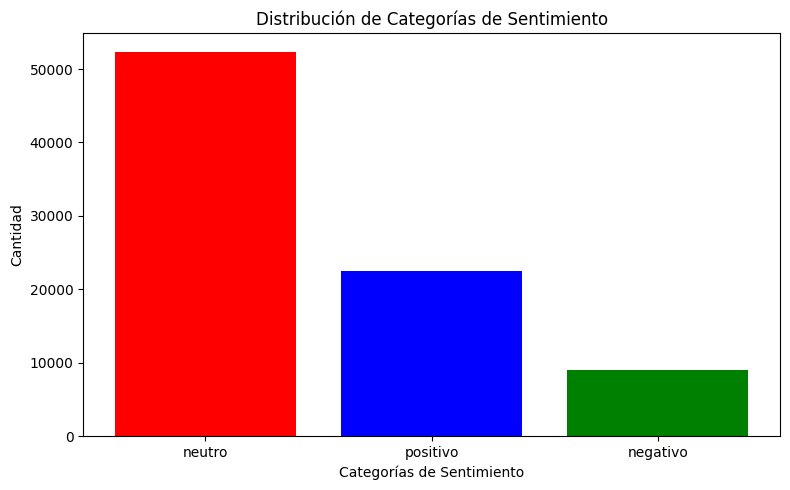

In [ ]:
import matplotlib.pyplot as plt

# Contar las ocurrencias de cada categoría en la columna 'sentimiento_bert'
category_counts = coment_tweets.select(
    pl.col("sentimiento_bert").value_counts()
)
# Convertir Polars a Pandas para facilitar la visualización
category_counts_pd = category_counts.to_pandas()
category_counts_pd = pd.json_normalize(category_counts_pd["sentimiento_bert"])
print(category_counts_pd)

# Crear el gráfico de barras
plt.figure(figsize=(8, 5))
plt.bar(category_counts_pd["sentimiento_bert"], category_counts_pd["count"], color=["red", "blue", "green"])
plt.title("Distribución de Categorías de Sentimiento")
plt.xlabel("Categorías de Sentimiento")
plt.ylabel("Cantidad")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
coment_tweets.write_csv("/content/drive/MyDrive/tesis/sentimientos.csv")

In [ ]:
import polars as pl

In [ ]:
tweets_bav= pd.read_csv('/content/drive/MyDrive/tesis/new_post_with_topics (1).csv',encoding='latin',delimiter=';')
tweets_bav

,account_name,date,content,link,likes,source,conteo_post,cleaned_content,word_count,topic,WORDS TOPIC,Nombre
0,bavaria_colombia,2024-10-12 00:00:00,??? En este fin de semana festivo recuerda ser...,https://www.instagram.com/p/DBBssgYpnVJ/,72,instagram,1,??? fin semana festivo recuerda ser buen actor...,24,1,"parche,parceros,así,concierto,vemos",Vive el Parche
1,bavaria_colombia,2024-10-11 00:00:00,#ValeLaPenaLeer ?? | Andrés Ospina - @af_ospi...,https://www.instagram.com/p/DBADbRKScYe/?img_i...,711,instagram,1,?? andrés ospina head of draftline innovation ...,71,5,"millones,premios,tapa,peso,goles",Millones por Destapar
2,bavaria_colombia,2024-10-11 00:00:00,"???¡Cerveza, amigas y muchas risas! Recuerda e...",https://www.instagram.com/p/DA_-1URJxxD/,59,instagram,1,???cerveza amigas muchas risas recuerda fin se...,18,4,"frías,cerveza,fútbol,combo",Goles y Frías
3,bavaria_colombia,2024-10-11 00:00:00,"?Hoy nuestro brindis va por Andrés Ospina, dir...",https://www.instagram.com/p/DA_dKbjp8Jf/,475,instagram,1,?hoy brindis va andrés ospina director equipo ...,56,3,"conoce,convocatoria,parte,equipo,aquí",Juntos en Equipo
4,bavaria_colombia,2024-10-10 00:00:00,¡Así vivimos la semana pasada la experiencia #...,https://www.instagram.com/p/DA91MIxpe39/,65,instagram,1,así vivimos semana pasada experiencia ?? tip m...,14,1,"parche,parceros,así,concierto,vemos",Vive el Parche
...,...,...,...,...,...,...,...,...,...,...,...,...
2604,CervezaPoker,2023-10-31 00:00:00,Breve vamos a Salvar a 10 parceros de este par...,https://x.com/CervezaPoker/status/171938103262...,28,Twitter,1,breve vamos salvar parceros parche vayan medal...,8,1,"parche,parceros,así,concierto,vemos",Vive el Parche
2605,CervezaPoker,2023-10-26 00:00:00,¿Quién ya tiene boleta para el Soy Rebelde Tou...,https://x.com/CervezaPoker/status/171758330158...,146,Twitter,1,quién boleta rebelde tour faltan tiquetes avió...,17,2,"junto,mejor,gratis,futuro,tenderos",Tenderos y Futuro
2606,CervezaPoker,2023-10-17 00:00:00,"Parceros, ir al Soy Rebelde Tour es demasiado ...",https://x.com/CervezaPoker/status/171437893005...,5,Twitter,1,parceros ir rebelde tour demasiado fácil regís...,17,1,"parche,parceros,así,concierto,vemos",Vive el Parche
2607,CervezaPoker,2023-10-05 00:00:00,¿Sin boleta para el Soy Rebelde Tour? \n\nEscr...,https://x.com/CervezaPoker/status/171003915938...,16,Twitter,1,boleta rebelde tour escríbanme unas regalar,6,2,"junto,mejor,gratis,futuro,tenderos",Tenderos y Futuro


In [ ]:
coment_tweets= pd.read_csv('/content/drive/MyDrive/tesis/sentimientos.csv',delimiter=',')
coment_tweets

,Link,author,comment,date,source,cleaned_comment,sentimiento_bert
0,https://www.instagram.com/p/DAj76PKMeOE/c/1785...,correodebu,🔥👏,2024-10-01 00:47:50,instagram,NaN,neutro
1,https://www.instagram.com/p/DAj76PKMeOE/c/1804...,carolaalvarezv,🙌🙌🙌🙌❤️,2024-10-01 01:33:14,instagram,NaN,neutro
2,https://www.instagram.com/p/DAj76PKMeOE/c/1806...,oscargon2022,👍👍👍👍👍🍻🍻🍻🍻🍻,2024-10-02 19:54:14,instagram,NaN,neutro
3,https://www.instagram.com/p/DAj76PKMeOE/c/1800...,clubcolombia,"@correodebu, 🍻🌾.",2024-10-04 13:51:27,instagram,NaN,neutro
4,https://www.instagram.com/p/DAj76PKMeOE/c/1802...,clubcolombia,"@carolaalvarezv, 🌾✨.",2024-10-04 13:51:42,instagram,NaN,neutro
...,...,...,...,...,...,...,...
83737,https://x.com/CervezaPoker/status/171003915938...,@GallegoEdilma,"""Sálvame"" con unas Boleticas para RBD",2023-10-05 21:12:01,Twitter,slvame con unas boleticas para rbd,neutro
83738,https://x.com/CervezaPoker/status/171003915938...,@CervezaPoker,¡Vamos pa' esaaaa! \nTe salvaremos de esa oscu...,2023-10-07 15:59:59,Twitter,vamos pa esaaaa te salvaremos de esa oscuridad...,positivo
83739,https://x.com/CervezaPoker/status/170959806762...,@CervezaPoker,"Parceros, ¿qué los tiene sobreviviendo por pur...",2023-10-04 15:55:16,Twitter,parceros qu los tiene sobreviviendo por pura a...,neutro
83740,https://x.com/CervezaPoker/status/170959806762...,@Stephyc24,No poder ir al concierto de RBD,2023-10-06 23:39:01,Twitter,no poder ir al concierto de rbd,negativo


In [ ]:
sentiments=coment_tweets.groupby(["Link", "sentimiento_bert"]).size().unstack(fill_value=0)


In [ ]:
coments_senti=pd.merge(tweets_bav,sentiments,how='left',left_on='link',right_on='Link')
coments_senti.fillna(0)

,account_name,date,content,link,likes,source,conteo_post,cleaned_content,word_count,topic,WORDS TOPIC,Nombre,negativo,neutro,positivo
0,bavaria_colombia,2024-10-12 00:00:00,??? En este fin de semana festivo recuerda ser...,https://www.instagram.com/p/DBBssgYpnVJ/,72,instagram,1,??? fin semana festivo recuerda ser buen actor...,24,1,"parche,parceros,así,concierto,vemos",Vive el Parche,0.0,0.0,0.0
1,bavaria_colombia,2024-10-11 00:00:00,#ValeLaPenaLeer ?? | Andrés Ospina - @af_ospi...,https://www.instagram.com/p/DBADbRKScYe/?img_i...,711,instagram,1,?? andrés ospina head of draftline innovation ...,71,5,"millones,premios,tapa,peso,goles",Millones por Destapar,2.0,17.0,11.0
2,bavaria_colombia,2024-10-11 00:00:00,"???¡Cerveza, amigas y muchas risas! Recuerda e...",https://www.instagram.com/p/DA_-1URJxxD/,59,instagram,1,???cerveza amigas muchas risas recuerda fin se...,18,4,"frías,cerveza,fútbol,combo",Goles y Frías,0.0,2.0,0.0
3,bavaria_colombia,2024-10-11 00:00:00,"?Hoy nuestro brindis va por Andrés Ospina, dir...",https://www.instagram.com/p/DA_dKbjp8Jf/,475,instagram,1,?hoy brindis va andrés ospina director equipo ...,56,3,"conoce,convocatoria,parte,equipo,aquí",Juntos en Equipo,1.0,17.0,10.0
4,bavaria_colombia,2024-10-10 00:00:00,¡Así vivimos la semana pasada la experiencia #...,https://www.instagram.com/p/DA91MIxpe39/,65,instagram,1,así vivimos semana pasada experiencia ?? tip m...,14,1,"parche,parceros,así,concierto,vemos",Vive el Parche,0.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2604,CervezaPoker,2023-10-31 00:00:00,Breve vamos a Salvar a 10 parceros de este par...,https://x.com/CervezaPoker/status/171938103262...,28,Twitter,1,breve vamos salvar parceros parche vayan medal...,8,1,"parche,parceros,así,concierto,vemos",Vive el Parche,0.0,3.0,4.0
2605,CervezaPoker,2023-10-26 00:00:00,¿Quién ya tiene boleta para el Soy Rebelde Tou...,https://x.com/CervezaPoker/status/171758330158...,146,Twitter,1,quién boleta rebelde tour faltan tiquetes avió...,17,2,"junto,mejor,gratis,futuro,tenderos",Tenderos y Futuro,0.0,7.0,4.0
2606,CervezaPoker,2023-10-17 00:00:00,"Parceros, ir al Soy Rebelde Tour es demasiado ...",https://x.com/CervezaPoker/status/171437893005...,5,Twitter,1,parceros ir rebelde tour demasiado fácil regís...,17,1,"parche,parceros,así,concierto,vemos",Vive el Parche,1.0,2.0,0.0
2607,CervezaPoker,2023-10-05 00:00:00,¿Sin boleta para el Soy Rebelde Tour? \n\nEscr...,https://x.com/CervezaPoker/status/171003915938...,16,Twitter,1,boleta rebelde tour escríbanme unas regalar,6,2,"junto,mejor,gratis,futuro,tenderos",Tenderos y Futuro,1.0,9.0,1.0


In [ ]:
coments_senti.to_csv('/content/drive/MyDrive/tesis/posts_senti.csv')